In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install statsmodels
!pip install pmdarima

import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


In [6]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col = 'Month',
                 skipfooter = 2, parse_dates = True)

<ipython-input-6-1c29138b3173>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col = 'Month',


In [7]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Perrin Freres monthly champagne sales millions ?64-?72,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [10]:
df.columns = ['Sales']

<Axes: xlabel='Month'>

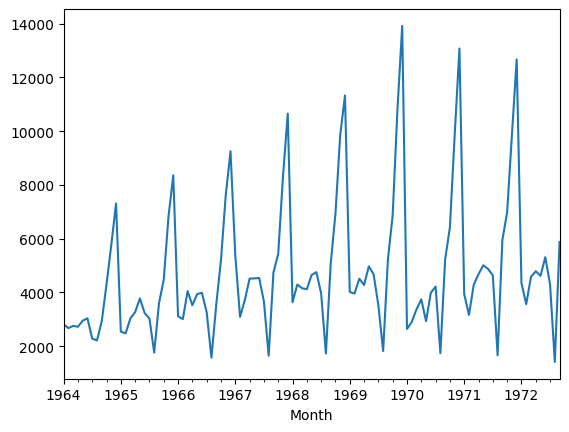

In [11]:
df['Sales'].plot()

<Axes: xlabel='Month'>

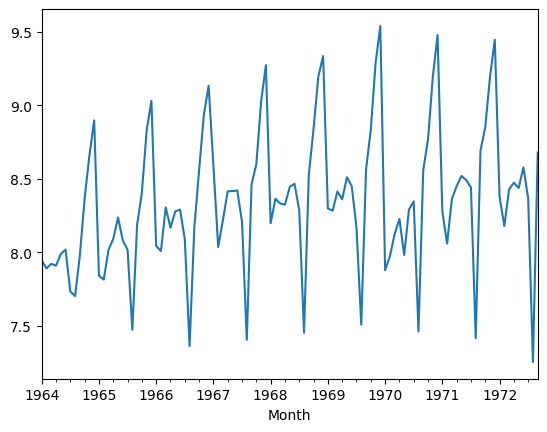

In [12]:
df['Logsales'] = np.log(df['Sales'])
df['Logsales'].plot()

In [13]:
df.index_freq = 'MS'

In [15]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [16]:
train_idx = df.index<= train.index[-1]
test_idx = df.index > train.index[-1]

In [17]:
model = pm.auto_arima(train['Logsales'],
                      seasonal = True,
                      supress_warnings = True, trace = True,
                      m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.311, Time=1.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.46 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.58 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.62 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.82 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.20 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.23 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.07 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  33.917
Date:                            Wed, 13 Mar 2024   AIC                            -57.834
Time:                                    09:28:18   BIC                            -45.862
Sample:                                01-01-1964   HQIC                           -53.031
                                     - 09-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.011      0.773      0.439      -0.013       0.029
ar.L1          0.8621      0.160      5.388      0.000       0.549       1.176
ma.L1         -0.6697      0.220     -3.047      0.002      -1.100      -0.239
ma.S.L12      -0.4795      0.116     -4.119      0.000      -0.708      -0.251
sigma2         0.0244      0.003      8.574      0.000       0.019       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
def plot_results(model, fulldata, train, test):

  train_pred = model.predict_in_sample(start = 12, end = -1)
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int=True)


  fig, ax = plt.subplots(figsize = (10, 5))
  ax.plot(df.index, df['Logsales'], label = 'Data')
  ax.plot(train.index[12:], train_pred, label = 'Fitted')
  ax.plot(test.index, test_pred, label = 'Forecast')

  ax.legend();

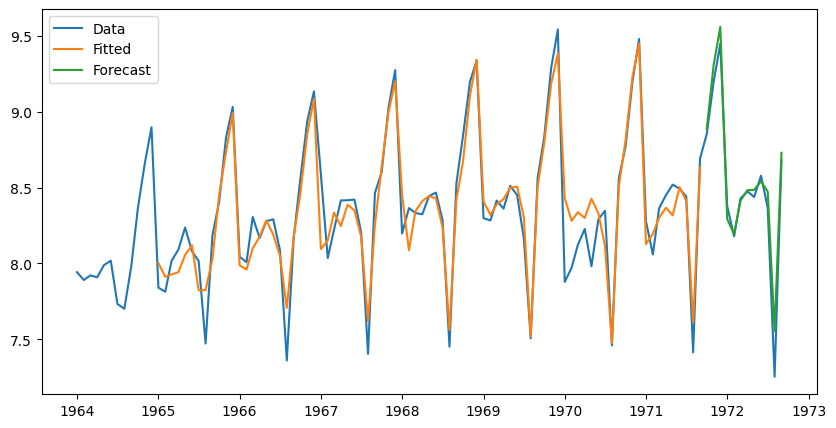

In [20]:
plot_results(model, df, train, test)